In [1]:
import pandas as pd
import numpy as np
import cv2
import requests

from PIL import Image, ImageStat
from os.path import exists

In [2]:
def run_query(query):
    response = requests.post('https://api.tarkov.dev/graphql', json={'query': query})
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception("Query failed to run by returning code of {}. {}".format(response.status_code, query))

In [3]:
# paths
path_icons = './icons/'
path_grid_icons = './grid_icons/'
path_data = './data/'

filename_ending_grid_icon = '-grid-image.jpg'

In [35]:
# get all icons from API
icons = []
icons.append(np.asarray(Image.open(path_icons + '5447ac644bdc2d6c208b4567-icon.jpg')))
icons.append(np.asarray(Image.open(path_icons + '54527ac44bdc2d36668b4567-icon.jpg')))

get_all_items = """
{
    items {
        id
        gridImageLink
    }
}
"""
query_result = run_query(get_all_items)['data']['items']


In [37]:
query_result[0]

{'id': '5447a9cd4bdc2dbd208b4567',
 'gridImageLink': 'https://assets.tarkov.dev/5447a9cd4bdc2dbd208b4567-grid-image.jpg'}

In [39]:
# download all icons
## Importing Necessary Modules
import requests # to get image from the web
import shutil # to save it locally

## Set up the image URL and filename
# for i in query_result:
#     item_id = i['id']
#     image_url = i['gridImageLink']
#     filename = image_url.split("/")[-1]

#     # Open the url image, set stream to True, this will return the stream content.
#     r = requests.get(image_url, stream = True)

#     # Check if the image was retrieved successfully
#     if r.status_code == 200:
#         # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
#         r.raw.decode_content = True

#         # Open a local file with wb ( write binary ) permission.
#         with open(filename,'wb') as f:
#             shutil.copyfileobj(r.raw, f)

#         print('Image sucessfully Downloaded: ',filename)
#     else:
#         print('Image Couldn\'t be retreived')

In [21]:
item['id']

'mosinscopedbarter0000001'

In [4]:
# get image data
## load dataframe from csv
all_items_df = pd.read_csv(path_data + 'all_items.csv')

In [20]:
## read icons from disk
icons = []
for index,item in all_items_df.iterrows():
    filename = path_grid_icons + item['id'] + filename_ending_grid_icon
    if exists(filename):
        icons.append(np.asarray(Image.open(filename)))
    else:
        icons.append([])
        print(f"File {filename} does not exist.")

File ./grid_icons/5737300424597769942d5a01-grid-image.jpg does not exist.
File ./grid_icons/5a327f7286f7747668661419-grid-image.jpg does not exist.
File ./grid_icons/5a327f7c86f77475187e509a-grid-image.jpg does not exist.
File ./grid_icons/5a327f9086f77475187e50a9-grid-image.jpg does not exist.
File ./grid_icons/5a43a85186f7746c914b947a-grid-image.jpg does not exist.
File ./grid_icons/5a43a86d86f7746c9d7395e8-grid-image.jpg does not exist.
File ./grid_icons/5ba3a14cd4351e003202017f-grid-image.jpg does not exist.
File ./grid_icons/5ba3a449d4351e0034778243-grid-image.jpg does not exist.
File ./grid_icons/5ba3a4d1d4351e4502010622-grid-image.jpg does not exist.
File ./grid_icons/5ba3a53dd4351e3bac12056e-grid-image.jpg does not exist.
File ./grid_icons/5c0c202e86f77448687e0368-grid-image.jpg does not exist.
File ./grid_icons/5c123fe086f7742a60324263-grid-image.jpg does not exist.
File ./grid_icons/5ebbfe23ba87a5065a00a563-grid-image.jpg does not exist.
File ./grid_icons/5ebbff0841a637322117

In [13]:
all_items_df.iloc[2655]

name                Rifle Dynamics RD-704 7.62x39 assault rifle
id                                     628a60ae6b1d481ff772e9c8
width                                                         3
height                                                        1
icon_width                                                  NaN
icon_height                                                 NaN
features                                                    NaN
fleaMarket                                                  NaN
flea_avg48                                                    0
flea_ch48percent                                            NaN
prapor                                                  22500.0
therapist                                                   NaN
fence                                                   18000.0
skier                                                       NaN
peacekeeper                                               205.0
mechanic                                

In [33]:
i = 2500
if len(icons[i]) == 0:
    print("list is empty")

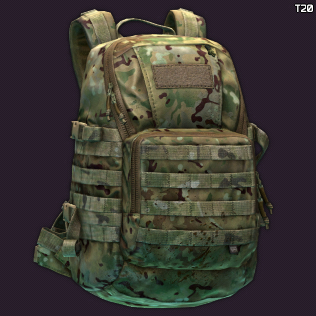

In [34]:
Image.fromarray(icons[i])

In [35]:
print(icons[i].shape)

(316, 316, 3)


In [36]:

# len(icons)

In [37]:
all_items_df['features'] = all_items_df['features'].astype('object')

icons_avg = []
for index in range(len(icons)):
    if len(icons[index]) == 0:
        continue
    
    item = all_items_df.iloc[index]
    nr_slot_x = item['width']
    nr_slot_y = item['height']
    icon_width = icons[index].shape[1]
    icon_height = icons[index].shape[0]
    
#     if nr_slot_x != nr_slot_y:
#         tmp_a = icon_width
#         tmp_b = icon_height
#         if nr_slot_x > nr_slot_y:
#             icon_width = max(tmp_a, tmp_b)
#             icon_height = min(tmp_a, tmp_b)
#         else:
#             icon_width = min(tmp_a, tmp_b)
#             icon_height = max(tmp_a, tmp_b)
            
    slot_width = (int) (icon_width / nr_slot_x)
    slot_height = (int) (icon_height / nr_slot_y)
    
#     print(index, nr_slot_x, nr_slot_y, slot_width, slot_height)
    
    r = 0
    g = 0
    b = 0
    
    all_items_df.loc[index, 'icon_width'] = slot_width
    all_items_df.loc[index, 'icon_height'] = slot_height
    
    icon_full = icons[index]
    
    features = []
    
    for i in range(nr_slot_x):
        for j in range (nr_slot_y):
            icon = icon_full[j*slot_height:(j+1)*slot_height, i*slot_width:(i+1)*slot_width]
            for x in range((int) (slot_width)):
                for y in range((int) (slot_height)):
                    r += (icon[y][x])[0]
                    g += (icon[y][x])[1]
                    b += (icon[y][x])[2]
            r = (int) (r / (slot_width*slot_height))
            g = (int) (g / (slot_width*slot_height))
            b = (int) (b / (slot_width*slot_height))
            features.append((r,g,b))
    
    all_items_df.at[index, 'features'] = features

0 1 1 316 127
1 1 1 64 64
2 1 1 64 64
3 2 1 63 64
4 1 1 64 64
5 1 1 64 64
6 1 1 64 64
7 1 2 64 63
8 1 1 64 64
9 1 1 64 64
10 1 1 64 64
11 2 1 63 64
12 3 1 105 64
13 2 2 63 63
14 1 3 64 63
15 1 2 64 63
16 1 1 64 64
17 2 1 63 64
18 3 4 63 63
19 4 4 63 63
20 1 1 64 64
21 1 1 64 64
22 1 1 64 64
23 1 1 64 64
24 1 2 64 63
25 1 1 64 64
26 1 2 64 63
27 1 1 64 64
28 1 1 64 64
29 1 1 64 64
30 5 6 63 63
31 4 4 63 63
32 2 1 63 64
33 3 1 63 64
34 4 1 94 64
35 2 1 189 64
36 1 1 64 64
37 1 2 64 63
38 1 1 64 64
39 1 1 64 64
40 1 1 64 64
41 2 1 63 64
42 2 1 63 64
43 3 1 63 64
44 5 1 63 64
45 4 1 63 64
46 3 1 63 64
47 4 1 63 64
48 1 1 64 64
49 2 1 63 64
50 2 1 63 64
51 2 1 63 64
52 1 2 64 63
53 1 3 64 63
54 1 2 64 63
55 1 1 64 64
56 2 1 63 64
57 3 1 63 64
58 2 2 63 63
59 1 2 64 63
60 1 1 64 64
61 1 1 64 64
62 2 1 63 64
63 1 1 64 64
64 1 1 64 64
65 1 1 64 64
66 2 1 63 64
67 2 1 63 64
68 2 1 63 64
69 3 1 63 64
70 3 1 63 64
71 3 1 63 64
72 4 1 63 64
73 4 1 63 64
74 5 1 63 64
75 5 1 63 64
76 5 1 63 64
77 5 

616 2 2 63 63
617 1 3 64 63
618 1 1 64 64
619 2 1 63 64
620 1 1 64 64
621 1 1 64 64
622 1 1 64 64
623 1 1 64 64
624 1 3 64 63
625 4 1 79 127
626 1 1 64 64
627 2 1 63 64
628 1 1 64 64
629 1 1 64 64
630 1 1 64 64
631 2 1 63 64
632 1 1 64 64
633 1 1 64 64
634 1 1 64 64
635 1 1 64 64
636 4 1 79 127
637 1 1 64 64
638 1 1 64 64
639 1 1 64 64
640 1 1 64 64
641 1 1 64 64
642 1 1 64 64
643 3 3 63 63
644 5 7 63 63
645 3 3 63 63
646 2 2 63 63
647 2 1 63 64
648 1 1 64 64
649 2 2 63 63
650 2 2 63 63
651 1 1 64 64
652 1 1 64 64
653 1 1 64 64
654 2 1 63 64
655 1 1 64 64
656 5 2 63 63
657 1 1 64 64
658 1 1 64 64
659 2 1 63 64
660 2 2 52 52
661 1 1 64 64
662 1 1 64 64
663 1 1 64 64
664 2 1 63 64
665 1 1 64 64
666 3 1 84 127
667 1 1 64 64
668 1 1 64 64
669 1 2 64 63
670 2 2 63 63
671 1 2 64 63
672 1 2 64 63
673 1 1 64 64
674 1 1 64 64
675 3 2 63 63
676 5 2 63 63
677 4 4 63 63
678 1 1 64 64
679 2 1 63 64
680 2 1 63 64
681 1 1 64 64
682 4 1 79 127
683 2 1 63 64
684 1 2 64 63
685 1 1 64 64
686 1 1 64 64
68

1215 5 2 63 63
1216 5 2 63 63
1217 1 1 64 64
1218 1 1 64 64
1219 1 1 64 64
1220 1 1 64 64
1221 1 1 64 64
1222 1 1 64 64
1223 1 1 64 64
1224 1 1 64 64
1225 1 1 64 64
1226 2 2 63 63
1227 1 1 64 64
1228 1 1 64 64
1229 1 2 64 63
1230 1 2 64 63
1231 1 1 64 64
1232 1 1 64 64
1233 2 1 63 64
1234 4 2 63 63
1235 2 2 63 63
1236 2 2 63 63
1237 2 2 63 63
1238 1 1 64 64
1239 1 1 64 64
1240 2 1 95 64
1241 2 1 63 64
1242 1 1 64 64
1243 1 3 64 63
1244 1 2 64 63
1245 2 2 63 63
1246 2 1 63 64
1247 3 1 63 64
1248 1 1 64 64
1249 2 1 63 64
1250 2 1 63 64
1251 2 1 63 64
1252 1 1 64 64
1253 2 1 63 64
1254 1 1 64 64
1255 1 1 64 64
1256 2 1 158 127
1257 4 1 79 127
1258 4 1 79 127
1259 1 1 64 64
1260 1 1 379 64
1261 4 1 63 64
1262 2 1 63 64
1263 2 1 63 64
1264 3 1 63 64
1265 3 1 63 64
1266 1 1 64 64
1267 3 1 63 64
1268 2 1 63 64
1269 2 1 63 64
1270 1 1 64 64
1271 1 1 64 64
1272 1 1 64 64
1273 2 1 63 64
1274 2 1 63 64
1275 1 1 316 64
1276 1 1 64 64
1277 1 2 64 63
1278 3 1 63 64
1279 4 1 63 64
1280 3 1 63 64
1281

1774 4 1 63 64
1775 1 1 64 64
1776 1 1 64 64
1777 1 1 64 64
1778 1 1 64 64
1779 2 1 63 64
1780 3 4 63 63
1781 3 3 63 63
1782 4 3 63 63
1783 2 3 63 63
1784 5 5 63 63
1785 2 2 63 63
1786 2 2 63 63
1787 2 1 63 64
1788 1 1 64 64
1789 2 1 63 64
1790 2 1 63 64
1791 2 1 63 64
1792 2 2 63 63
1793 2 1 63 64
1794 1 1 64 64
1795 2 1 63 64
1796 1 1 64 64
1797 1 1 64 64
1798 1 1 64 64
1799 1 1 64 64
1800 1 1 64 64
1801 1 1 64 64
1802 1 1 64 64
1803 1 1 64 64
1804 1 1 64 64
1805 1 1 64 64
1806 1 1 64 64
1807 1 1 64 64
1808 1 1 64 64
1809 1 1 64 64
1810 1 1 64 64
1811 1 1 64 64
1812 1 1 64 64
1813 1 1 64 64
1814 1 1 64 64
1815 1 1 64 64
1816 1 2 64 63
1817 1 2 64 63
1818 1 1 64 64
1819 1 1 64 64
1820 1 1 64 64
1821 1 1 64 64
1822 1 1 64 64
1823 1 1 64 64
1824 1 1 64 64
1825 1 1 64 64
1826 1 1 64 64
1827 1 1 64 64
1828 1 1 64 64
1829 1 1 64 64
1830 1 1 64 64
1831 1 1 64 64
1832 1 1 64 64
1833 1 1 64 64
1834 1 1 64 64
1835 1 1 64 64
1836 1 1 64 64
1837 1 1 64 64
1838 1 1 64 64
1839 1 1 64 64
1840 1 1 6

2337 1 1 64 64
2338 2 1 63 64
2339 1 1 64 64
2340 2 1 63 64
2341 1 1 64 64
2342 1 1 64 64
2343 1 1 64 64
2344 2 1 63 64
2345 1 1 64 64
2346 1 1 64 64
2347 1 1 64 64
2348 1 1 64 64
2349 1 1 64 64
2350 2 1 63 64
2351 1 1 64 64
2352 1 1 64 64
2353 1 1 64 64
2354 1 1 64 64
2355 1 1 64 64
2356 1 1 64 64
2357 1 1 64 64
2358 1 1 64 64
2359 1 1 64 64
2360 1 1 379 127
2361 1 1 64 64
2362 3 1 63 64
2363 3 1 63 64
2364 2 2 63 63
2365 4 1 63 64
2366 1 1 64 64
2367 1 1 64 64
2368 3 1 63 64
2369 2 1 63 64
2370 1 1 64 64
2371 1 2 64 63
2372 1 1 64 64
2373 2 1 63 64
2374 2 1 63 64
2375 2 1 63 64
2376 2 1 63 64
2377 1 1 64 64
2378 2 1 63 64
2379 2 1 63 64
2380 2 1 63 64
2381 2 1 63 64
2382 2 1 63 64
2383 1 1 64 64
2384 2 2 63 63
2385 2 2 63 63
2386 1 1 379 127
2387 1 1 64 64
2388 1 1 62 62
2389 2 1 63 64
2390 2 1 63 64
2391 2 1 63 64
2392 1 1 64 64
2393 1 1 64 64
2394 2 1 63 64
2395 1 2 64 63
2396 1 1 64 64
2397 1 1 64 64
2398 1 1 64 64
2399 1 1 64 64
2400 1 1 64 64
2401 2 1 63 64
2402 2 1 63 64
2403 2

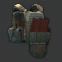

In [40]:
Image.fromarray(icons[2527])

In [41]:
all_items_df.iloc[2527]

name                FirstSpear Strandhogg plate carrier rig (Range...
id                                           61bcc89aef0f505f0c6cd0fc
width                                                               3
height                                                              4
icon_width                                                       20.0
icon_height                                                      15.0
features            [(61, 61, 58), (55, 54, 51), (52, 56, 54), (54...
fleaMarket                                                        NaN
flea_avg48                                                          0
flea_ch48percent                                                  NaN
prapor                                                        36500.0
therapist                                                         NaN
fence                                                         29200.0
skier                                                         35770.0
peacekeeper         

In [42]:
# save dataframe as csv
all_items_df.to_csv(path_data + 'all_items.csv', index=False)

In [43]:
all_items_df.iloc[3]

name                    Makarov PM 9x18PM pistol
id                      5448bd6b4bdc2dfc2f8b4569
width                                          2
height                                         1
icon_width                                  63.0
icon_height                                 64.0
features            [(21, 22, 22), (33, 30, 29)]
fleaMarket                                6000.0
flea_avg48                                  8814
flea_ch48percent                           11.72
prapor                                    2548.0
therapist                                    NaN
fence                                     2038.0
skier                                        NaN
peacekeeper                                 23.0
mechanic                                  2854.0
ragman                                       NaN
jaeger                                       NaN
Name: 3, dtype: object

In [44]:
feature_dict = []
for i in range(256):
    feature_dict.append([])

In [45]:
# add icon features to feature list
for index,item in all_items_df.iterrows():
    if isinstance(item['features'], list):
        for feature in item['features']:
            for c in range(3):
                if not index in feature_dict[feature[c]]:
                    feature_dict[feature[c]].append(index)

In [46]:
feature_dict_df = pd.DataFrame({'features': feature_dict})

In [47]:
# save dataframe as csv
feature_dict_df.to_csv(path_data + 'all_features.csv')

In [48]:
feature_dict

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [2176],
 [],
 [],
 [882, 1185, 1720, 1747, 1749, 2017, 2176, 2319, 2423, 2424, 2426, 2427, 2455],
 [462,
  882,
  883,
  888,
  1036,
  1057,
  1166,
  1167,
  1185,
  1187,
  1348,
  1349,
  1720,
  1747,
  1748,
  1749,
  1750,
  2176,
  2183,
  2319,
  2423,
  2424,
  2425,
  2426,
  2427,
  2451,
  2452,
  2455,
  2722],
 [138,
  175,
  274,
  292,
  361,
  393,
  404,
  420,
  462,
  666,
  834,
  858,
  883,
  888,
  1017,
  1036,
  1057,
  1166,
  1167,
  1185,
  1187,
  1348,
  1349,
  1442,
  1720,
  1747,
  1748,
  1749,
  1750,
  1751,
  2183,
  2319,
  2423,
  2424,
  2425,
  2426,
  2427,
  2451,
  2452,
  2455,
  2722],
 [12,
  89,
  138,
  274,
  292,
  361,
  379,
  382,
  393,
  404,
  462,
  523,
  585,
  625,
  666,
  701,
  750,
  834,
  858,
  882,
  883,
  888,
  962,
  1036,
  1166,
  1167,
  1185,
  1187,
  1257,
  1348,
  1349,
  1442,
  1564,
  1595,
  1720,
  1747,
  1748,
  1749,
  1750,
